# Statistics

In [1]:
import pandas as pd
import os
import matplotlib
from matplotlib import pyplot as plt
from collections import Counter
import seaborn as sns

In [2]:
data_path = "data/"
output_path = "data/"

## Import Data

In [3]:
mentions_fr = pd.read_pickle(data_path + "mentions_fr.pkl")
mentions_de = pd.read_pickle(data_path + 'mentions_de.pkl')
mentions_all = pd.concat([mentions_fr, mentions_de])

articles_fr = pd.read_pickle(data_path + "articles_fr.pkl")
articles_de = pd.read_pickle(data_path + 'articles_de.pkl')
articles = pd.concat([articles_fr, articles_de])

In [4]:
#divide by country
mentions_ch = mentions_all[mentions_all['country'] == 'CH']
mentions_lu = mentions_all[mentions_all['country'] == 'LU']

articles_ch = articles[articles['country'] == 'CH']
articles_lu = articles[articles['country'] == 'LU']

## Inference Stats

In [5]:
print(f"Total number of agency mentions: {len(mentions_all)}")
print(f"Total number of articles with agency mentions: {len(articles)}\n")

print(f"FR - #mentions: {len(mentions_fr)}")
print(f"FR - #articles: {len(articles_fr)}\n")

print(f"DE - #mentions: {len(mentions_de)}")
print(f"DE - #articles: {len(articles_de)}\n")

print(f"CH - #mentions: {len(mentions_ch)}")
print(f"CH - #articles: {len(articles_ch)}\n")

print(f"LU - #mentions: {len(mentions_lu)}")
print(f"LU - #articles: {len(articles_lu)}")

Total number of agency mentions: 4482890
Total number of articles with agency mentions: 2406634

FR - #mentions: 2853727
FR - #articles: 1754146

DE - #mentions: 1629163
DE - #articles: 652488

CH - #mentions: 4326729
CH - #articles: 2291218

LU - #mentions: 156161
LU - #articles: 115416


In [6]:
#specify decades
decades = sorted(articles['decade'].unique())
relevant_decs = list(range(1840, 2010, 10))

<AxesSubplot: title={'center': '#articles per decade'}, ylabel='Frequency'>

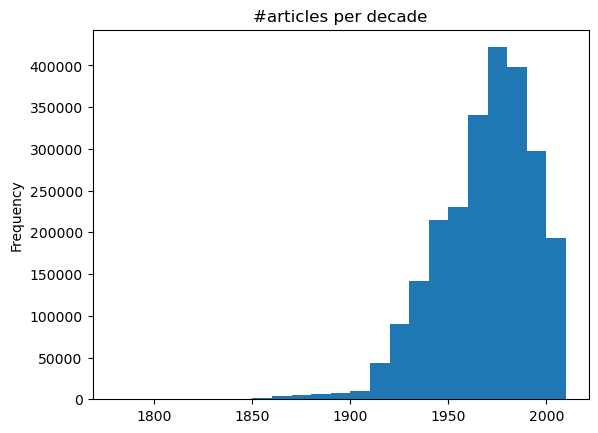

In [7]:
articles['decade'].plot.hist(bins=decades, title="#articles per decade")

<AxesSubplot: title={'center': '#articles per decade (1840-2000)'}, ylabel='Frequency'>

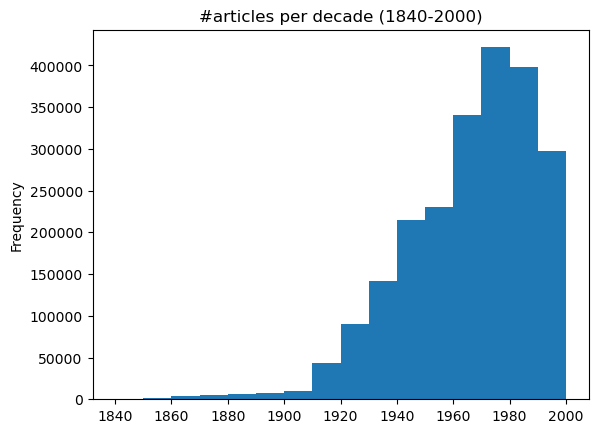

In [8]:
articles.loc[articles['decade'].isin(relevant_decs[:-1]), 'decade'].plot.hist(bins=relevant_decs, title="#articles per decade (1840-2000)")

<AxesSubplot: title={'center': '#mentions per decade'}, ylabel='Frequency'>

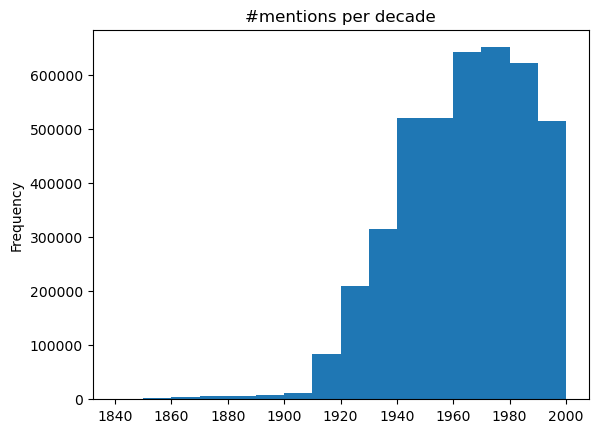

In [9]:
mentions_all.loc[mentions_all['decade'].isin(relevant_decs[:-1]), 'decade'].plot.hist(bins=relevant_decs, title="#mentions per decade")

In [10]:
#import frequencies of articles in impresso per year
all_impresso_art_page = pd.read_csv(output_path + "counts_impresso_yearly_page-art.csv", delimiter=";", usecols=['Year', 'Number ar + page']).rename(
    columns={'Year': 'year', 'Number ar + page':'count'})
all_impresso_art_page = all_impresso_art_page.sort_values(by='year')
all_impresso_art_page1820 = all_impresso_art_page[all_impresso_art_page['year'] >= 1820]
all_impresso_art_page.tail()

,year,count
245,2014,72514
246,2015,68400
247,2016,72246
248,2017,64434
249,2018,1828


In [11]:
print(f"Overall #articles which were used during inference: {all_impresso_art_page['count'].sum()}")

Overall #articles which were used during inference: 25064982


In [12]:
#Pauline's code

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

def get_c_per_year(year, colors = colors, sep = 10):
    # change color every sep years to visualize better
    return colors[(year // sep)%len(colors)]

def img_bar_plot(df, ax, xticks, title, log_scale = False, colors_sep=10, overlay_df = None):
    '''Display the yearly counts in df using a bar plot.
    
    df (DataFrame): data to be displayed, should include a col named 'year' and another called 'count'
    ax : figure axis to use for plotting, allows to construct subplots if needed
    xticks (iterator or list): range for ticks along x axis
    log_scale (bool): if True the counts will be displayed with a logarithmic scale for the y-axis
    colors_sep (int): number of years between color changes
    overlay_df (DataFrame): if not None, will display overlay_df's counts with reduced opacity.
    '''
    # get the colors for each years 
    colors = [get_c_per_year(y, sep=colors_sep) for  y in df['year']]
    
    # plot the counts
    ax.bar(df['year'], df['count'], color=colors)
    if(overlay_df is not None):
        # if overlay_df, add second set of counts
        ax.bar(df['year'], overlay_df['count'], color=colors, alpha=0.2)
    ax.set_xticks(xticks)
    if(log_scale):
        ax.set_yscale('log')
    ax.set_title(title)
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')

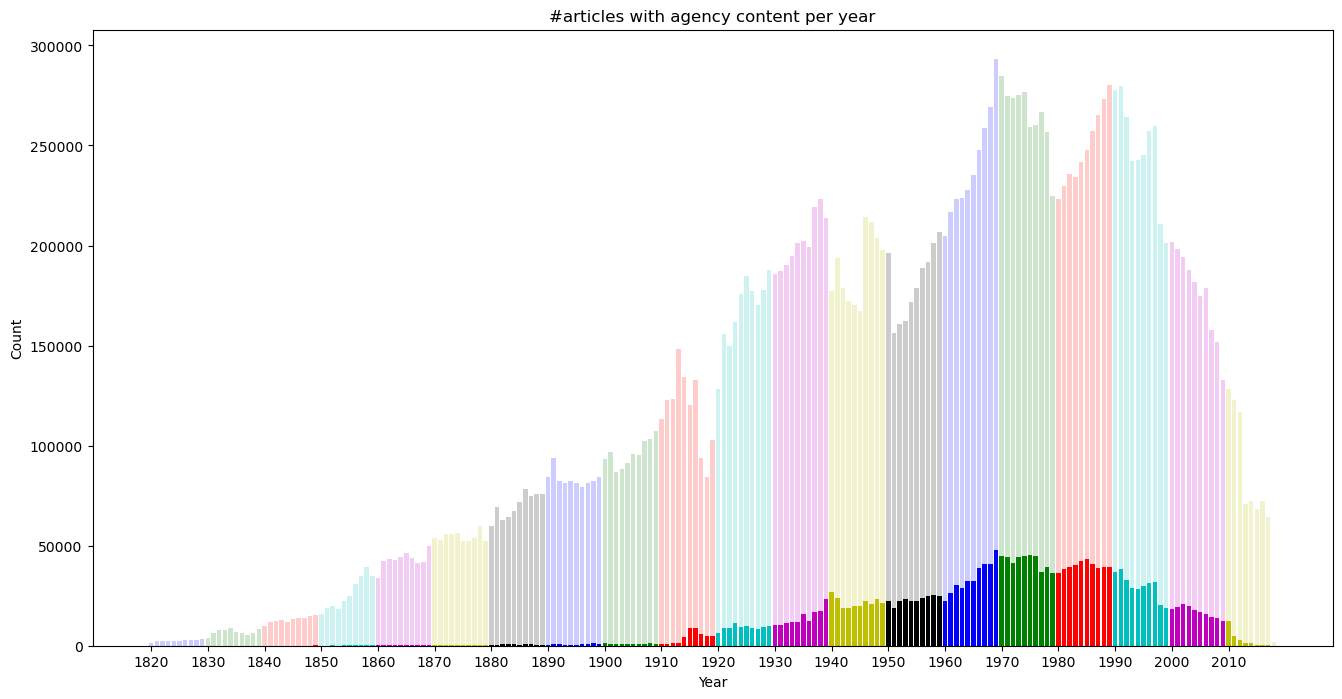

In [13]:
na_per_year = articles[['article', 'year']].groupby('year').count().reset_index().rename(columns={'article': 'count'})
na_per_year1820 = na_per_year[na_per_year['year']>=1820]

f, ax = plt.subplots(1, figsize=(16,8))
img_bar_plot(na_per_year1820, ax, range(1820, 2019, 10), title="#articles with agency content per year", overlay_df=all_impresso_art_page1820)

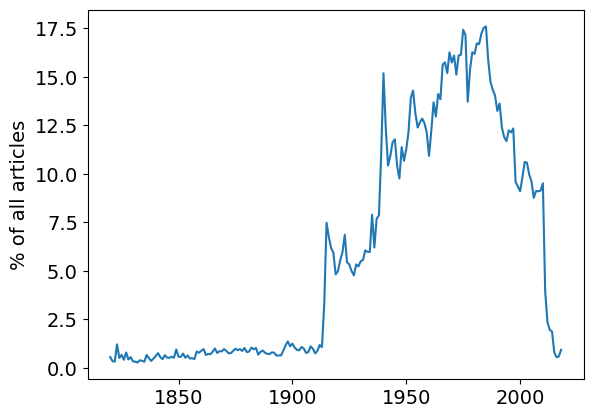

In [14]:
matplotlib.rcParams.update({'font.size': 14})

stats_per_year = na_per_year1820.merge(all_impresso_art_page1820.rename(columns={'count': 'count_impresso'}), on='year')
stats_per_year['perc'] = stats_per_year['count'] / stats_per_year['count_impresso'] * 100

plt.plot(list(range(1820, 2019)), stats_per_year['perc'])
plt.ylabel('% of all articles')
#plt.title('Percentage of agency articles in impresso corpus per year')
plt.show()

In [15]:
matplotlib.rcParams.update({'font.size': 10})

In [16]:
stats_per_year[stats_per_year['year'].isin(list(range(1910, 1921)))]

,year,count,count_impresso,perc
90,1910,841,113424,0.741466
91,1911,1080,123045,0.877728
92,1912,1450,123135,1.177569
93,1913,1583,148044,1.069277
94,1914,4455,134350,3.315966
95,1915,8998,120376,7.474912
96,1916,8948,132633,6.746436
97,1917,5796,93871,6.174431
98,1918,5004,84386,5.929894
99,1919,4951,102758,4.818116


In [17]:
stats_per_year[stats_per_year['year'].isin(list(range(1935, 1945)))]

,year,count,count_impresso,perc
115,1935,15968,202483,7.886094
116,1936,12345,199082,6.200962
117,1937,16848,219369,7.680210
118,1938,17551,223346,7.858211
119,1939,23529,213707,11.009934
120,1940,26933,177439,15.178737
121,1941,24011,194015,12.375847
122,1942,18634,178801,10.421642
123,1943,18781,172078,10.914237
124,1944,19777,170157,11.622795


In [18]:
stats_per_year[stats_per_year['year'].isin(list(range(1960, 1990)))]

,year,count,count_impresso,perc
140,1960,22351,204665,10.920773
141,1961,26473,216691,12.216936
142,1962,30573,223408,13.684828
143,1963,28998,223900,12.951318
144,1964,32146,227833,14.109457
145,1965,32533,235097,13.838118
146,1966,38678,247501,15.627412
147,1967,40716,258690,15.739302
148,1968,40919,269427,15.187416
149,1969,47654,293199,16.253125


# Agencies

<AxesSubplot: title={'center': '#mentions per agency'}, xlabel='agency'>

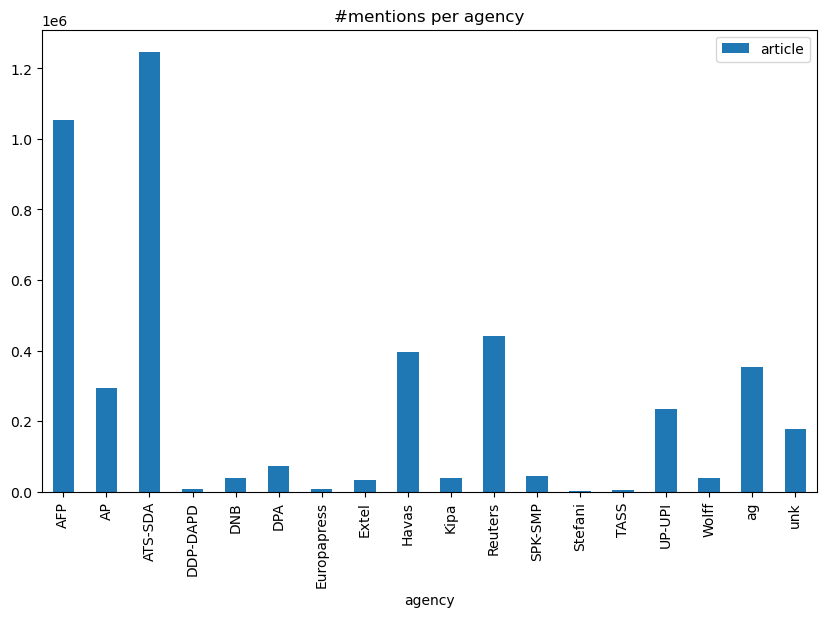

In [19]:
mentions_all[['article', 'agency']].groupby('agency').count().plot.bar(figsize=(10,6), title="#mentions per agency")

In [20]:
ag_by_lang_ch = mentions_ch.groupby(['language', 'agency']).size().reset_index().pivot(columns='language', index='agency', values=0)
ag_by_lang_lu = mentions_lu.groupby(['language', 'agency']).size().reset_index().pivot(columns='language', index='agency', values=0)

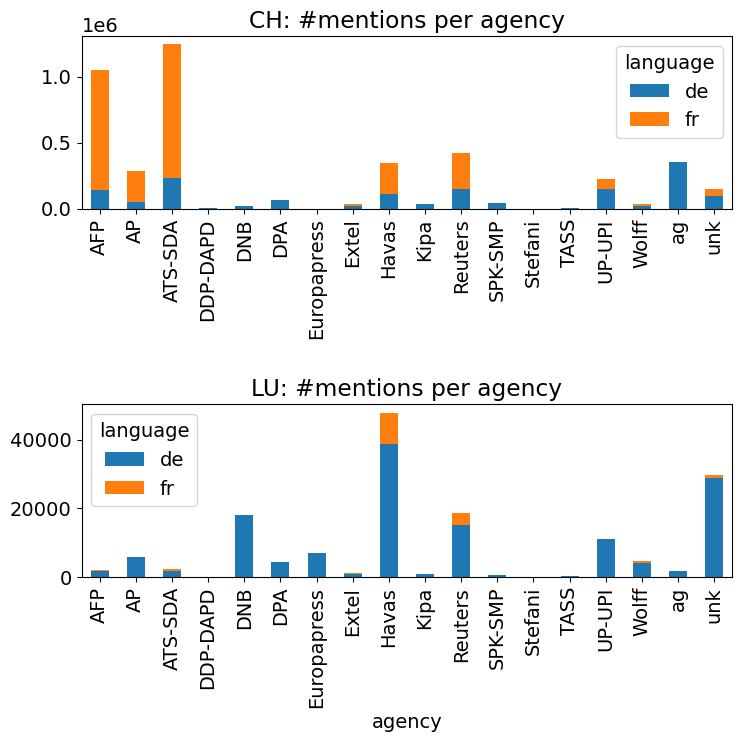

In [21]:
matplotlib.rcParams.update({'font.size': 14})

fig, (ax1, ax2) = plt.subplots(2, figsize=(8,8))
ag_by_lang_ch.plot.bar(title="CH: #mentions per agency", ax=ax1, stacked=True)
ag_by_lang_lu.plot.bar(title="LU: #mentions per agency", ax=ax2, stacked=True)
ax1.set_xlabel("")
fig.tight_layout(pad=2.0)
plt.show()

In [22]:
matplotlib.rcParams.update({'font.size': 10})

### Development over Time

In [23]:
#specifying colors for agencies
agencies = sorted(mentions_all['agency'].unique())
colors = plt.cm.tab20
clist = [colors(i) for i in range(colors.N)]
custom_cmap = dict(zip(agencies, clist[:len(agencies)]))

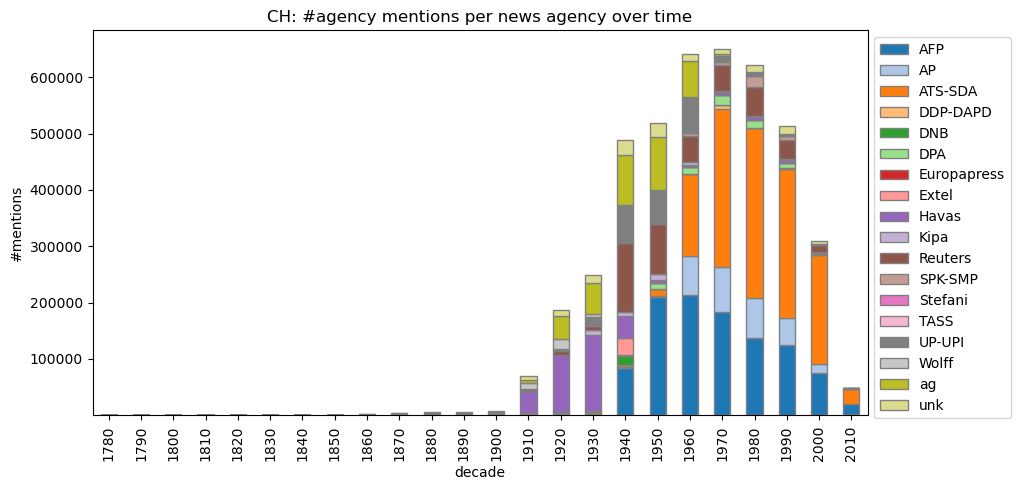

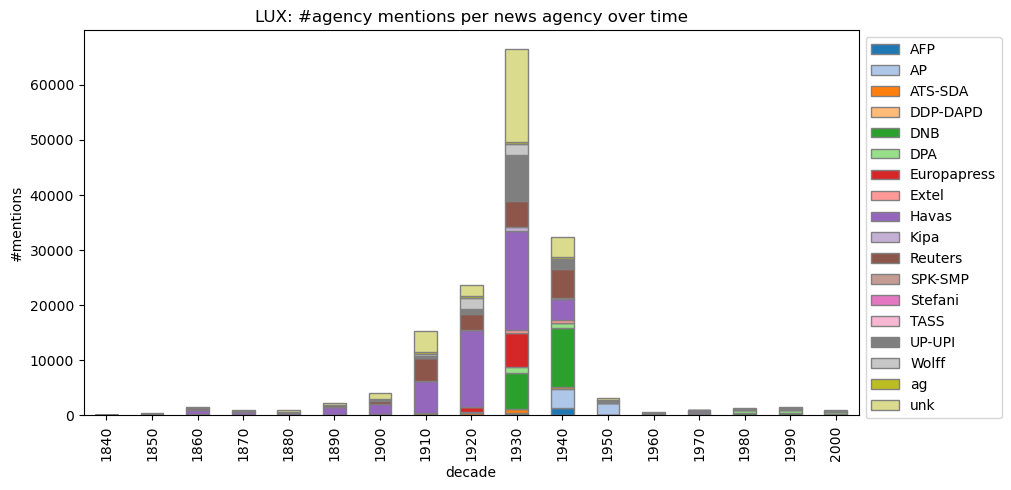

In [24]:
#Switzerland
na_per_decade_ch = pd.pivot_table(mentions_ch, index="decade", columns="agency", values="article", aggfunc="count")

na_per_decade_ch.plot(kind="bar", stacked=True, figsize=(10,5), ylabel="#mentions", title="CH: #agency mentions per news agency over time", color=custom_cmap, edgecolor="grey")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

#Luxembourg
na_per_decade_lux = pd.pivot_table(mentions_lu, index="decade", columns="agency", values="article", aggfunc="count")

na_per_decade_lux.plot(kind="bar", stacked=True, figsize=(10,5), ylabel="#mentions", title="LUX: #agency mentions per news agency over time", color=custom_cmap, edgecolor="grey")
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

#Plot
plt.show()

In [25]:
def plot_ag_by_time_lang(orig_df, country, time_level="decade", intervals = relevant_decs):

    df = orig_df[orig_df['country'] == country]
    if country == "CH":
        full_country = "Switzerland"
    elif country == "LU":
        full_country = "Luxembourg"
    else:
        raise NameError("Use CH or LU for country")

    fig, (ax1, ax2) = plt.subplots(2, figsize=(10,10), sharex=True)
    #French
    na_per_decade_fr = pd.pivot_table(df[(df['language'] == "fr") & (df[time_level].isin(intervals))], 
                                    index=time_level, columns="agency", values="article", aggfunc="count")

    na_per_decade_fr.plot(kind="bar", stacked=True, ylabel="#mentions", title=f"{full_country} - FR: #agency mentions per news agency over time", 
                        color=custom_cmap, edgecolor="grey", legend=False, ax=ax1)

    #German
    na_per_decade_de = pd.pivot_table(df[(df['language'] == "de") & (df[time_level].isin(intervals))], 
                                    index=time_level, columns="agency", values="article", aggfunc="count")

    na_per_decade_de.plot(kind="bar", stacked=True, ylabel="#mentions", title=f"{full_country} - DE: #agency mentions per news agency over time", 
                        color=custom_cmap, edgecolor="grey", legend=False, ax=ax2)

    #Plot formatting
    fig.tight_layout(pad=4.0)
    handles, labels = ax2.get_legend_handles_labels()
    fig.legend(handles, labels, bbox_to_anchor=(1,0.5), loc="center left")
    ax1.xaxis.set_tick_params(labelbottom=True, rotation=90)
    plt.show()

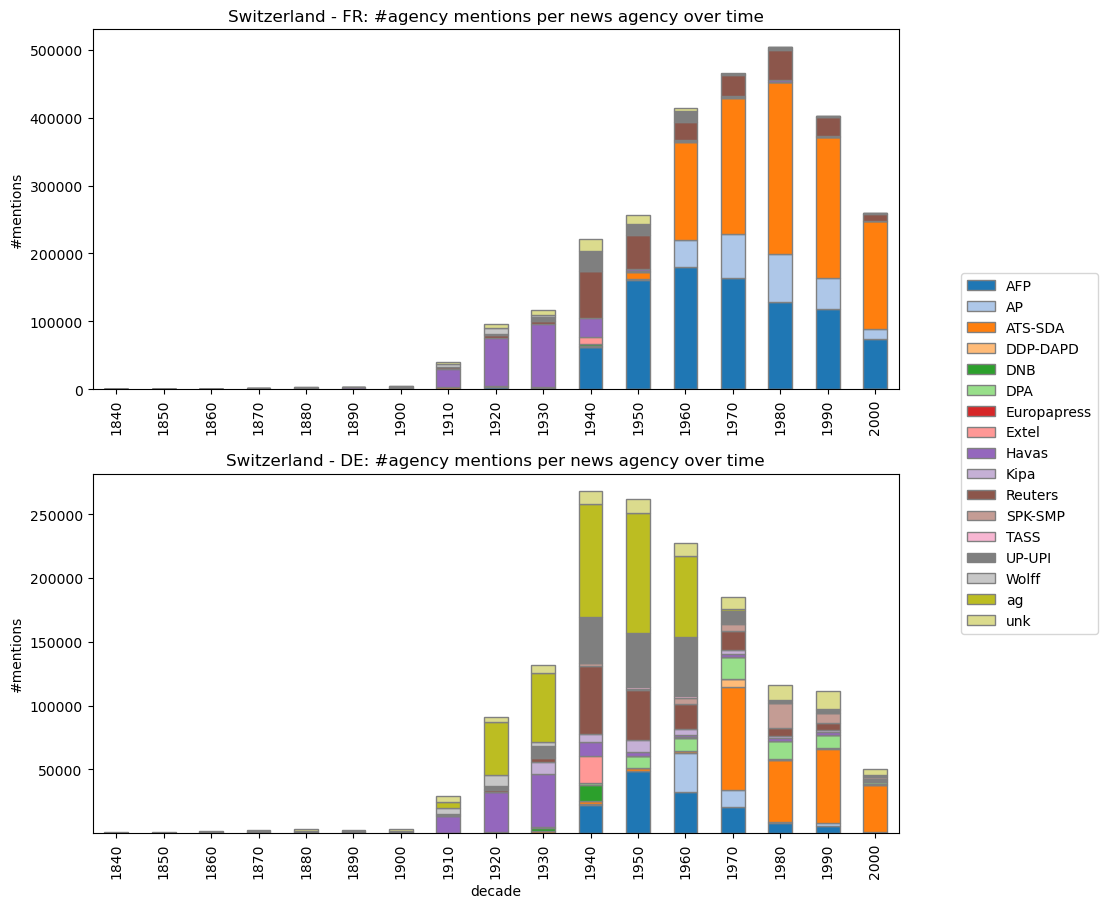

In [26]:
plot_ag_by_time_lang(mentions_ch, "CH")

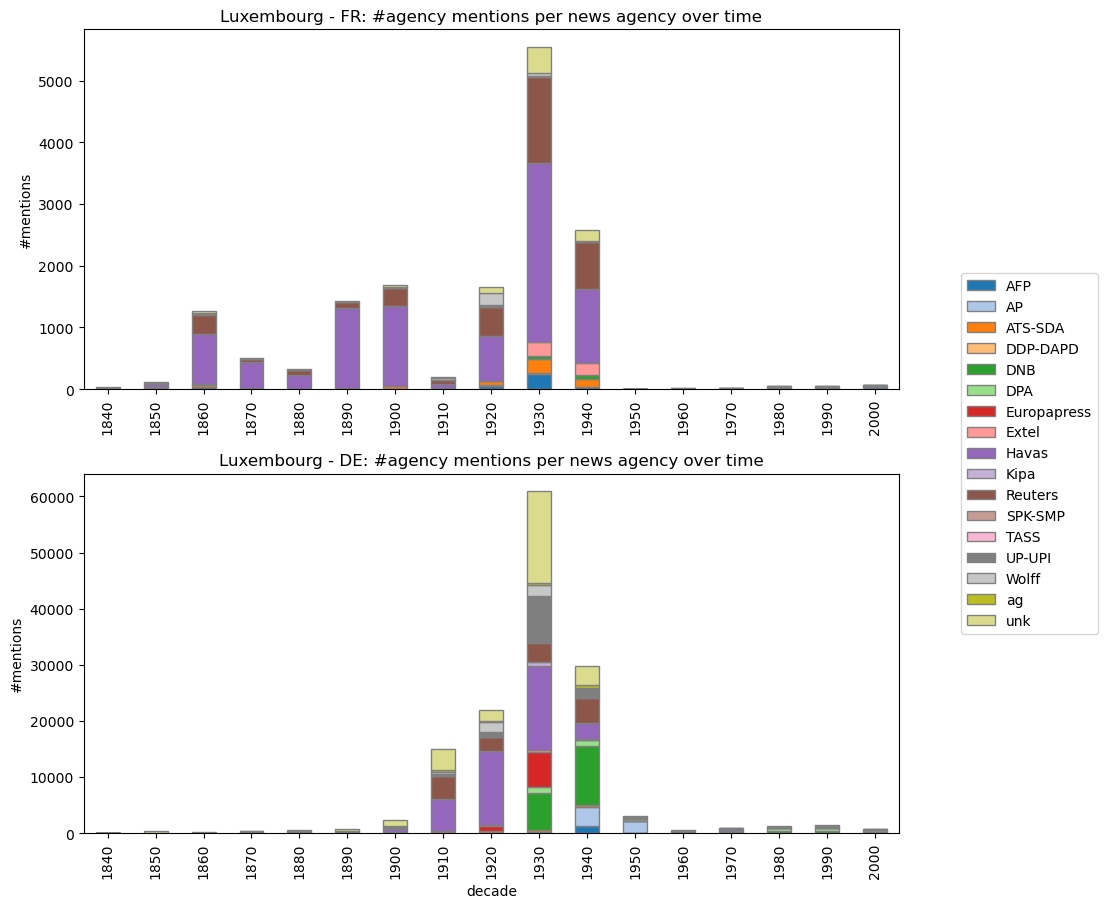

In [27]:
plot_ag_by_time_lang(mentions_lu, "LU")

## Life Cycles of Agencies

In [28]:
ag_list = pd.read_csv(data_path + "NA_list.csv", delimiter=";", usecols=['Abbr.', 'News Agency', 'Country', 'Creation', 'End']).set_index('Abbr.')
ag_list.head()

,News Agency,Country,Creation,End
Abbr.,,,,
AFP,Agence France-Presse,France,1944.0,NaN
ANP,Algemeen Nederlands Persbureau,Netherlands,1934.0,NaN
ANSA,Agenzia Nationale Stampa Associata,Italy,1945.0,NaN
AP,Associated Press,USA,1848.0,NaN
APA,Austria Press Agentur,Austria,1946.0,NaN


In [29]:
ag_by_year = mentions_all.groupby(['agency', 'year']).size().reset_index().pivot(columns='year', index='agency', values=0)
ag_by_year = ag_by_year.join(ag_list, how='left')
ag_by_year['End'] = ag_by_year['End'].fillna(2018).astype(int)
ag_by_year['Creation'] = ag_by_year['Creation'].fillna(1780).astype(int)
ag_by_year.head()

,1780,1781,1782,1783,1784,1785,1786,1787,1788,1789,...,2013,2014,2015,2016,2017,2018,News Agency,Country,Creation,End
AFP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1309.0,1083.0,850.0,766.0,789.0,38.0,Agence France-Presse,France,1944,2018
AP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,34.0,32.0,35.0,33.0,NaN,Associated Press,USA,1848,2018
ATS-SDA,1.0,2.0,2.0,NaN,NaN,NaN,1.0,1.0,NaN,2.0,...,861.0,1041.0,168.0,31.0,38.0,2.0,Agence Telegraphique Suisse/Schweizerische Dep...,Switzerland,1894,2018
DDP-DAPD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Deutscher Depeschendienst/Deutscher Auslands-D...,Germany,1971,2013
DNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Deutsches Nachrichtenbüro GmbH,Germany,1933,1945


In [30]:
ag_by_year['End']

AFP            2018
AP             2018
ATS-SDA        2018
DDP-DAPD       2013
DNB            1945
DPA            2018
Europapress    2018
Extel          1993
Havas          1940
Kipa           2015
Reuters        2018
SPK-SMP        1993
Stefani        1945
TASS           2018
UP-UPI         1990
Wolff          1934
ag             2018
unk            2018
Name: End, dtype: int64

In [31]:
mentions_all['agency'].value_counts()

ATS-SDA        1247658
AFP            1053035
Reuters         440501
Havas           395884
ag              354163
AP              294167
UP-UPI          234232
unk             177922
DPA              72605
SPK-SMP          44232
Wolff            39087
DNB              39066
Kipa             37499
Extel            33812
Europapress       7273
DDP-DAPD          6372
TASS              4859
Stefani            523
Name: agency, dtype: int64

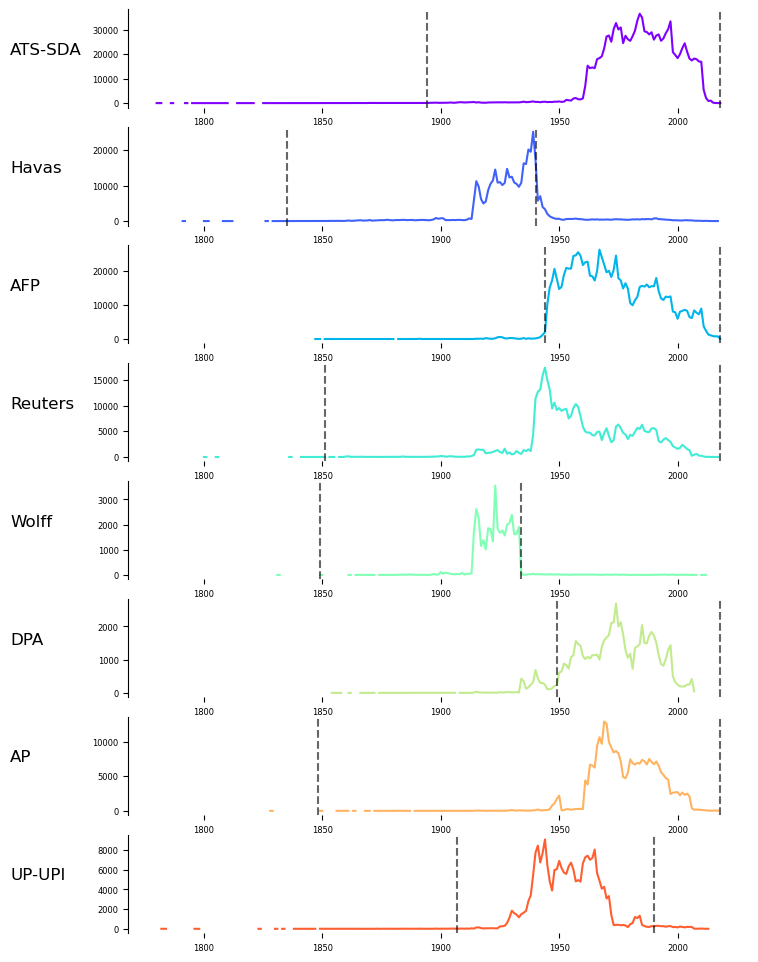

In [32]:
t = list(range(1780, 2019))
ags_to_plot = ['ATS-SDA', 'Havas', 'AFP', 'Reuters', 'Wolff', 'DPA', 'AP', 'UP-UPI']
cmap = plt.get_cmap('rainbow')

fig, axs = plt.subplots(nrows=len(ags_to_plot), ncols=1, sharex=True, figsize=(8, 1.5 * len(ags_to_plot)))
for i, ag in enumerate(ags_to_plot):
    ax = axs[i]
        
    #plot 
    ax.plot(t, ag_by_year.loc[ag, t], color=cmap(i/len(ags_to_plot)), label=ag)
    ax.axvline(ag_by_year.loc[ag, 'Creation'], color='black', linestyle='--', alpha=0.6)
    ax.axvline(ag_by_year.loc[ag, 'End'], color='black', linestyle='--', alpha=0.6)

    #formatting
    ax.tick_params('x', labelsize=6, labelbottom=True)
    ax.tick_params('y', labelsize=6)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    #set name of agency on the left
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    ax.text(xmin - 50, (ymax - ymin) / 2, ag, fontsize='large')
    #ax.spines['left'].set_visible(False)

plt.show()

### Checking Agencies' Abonnements

In [33]:
def get_subscribers_of_ag(ag, decs = relevant_decs):
    #choosing agency df
    df_ag = mentions_all.loc[(mentions_all['agency'] == ag) & (mentions_all['decade'].isin(decs))]
    #making dataframe with rows=decades, cols=newspapers
    df_ag_by_dec = df_ag.groupby(['decade', 'newspaper']).size().reset_index().pivot(columns='newspaper', index='decade', values=0)
    #only keep newspapers with at least one entry > 100
    keep_np = df_ag_by_dec.applymap(lambda x: None if x < 100 else x).dropna(axis=1, how='all').columns
    return df_ag_by_dec[keep_np]

def plot_subscribers_of_ag(ag, decs = relevant_decs, figsz = (12,6)):
    # get df for plotting   
    df_ag = get_subscribers_of_ag(ag, relevant_decs)

    #plotting
    df_ag.plot.bar(stacked=True, cmap='tab20', edgecolor='grey', figsize=figsz)
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    plt.title(f"Newspapers crediting {ag}")
    plt.show()

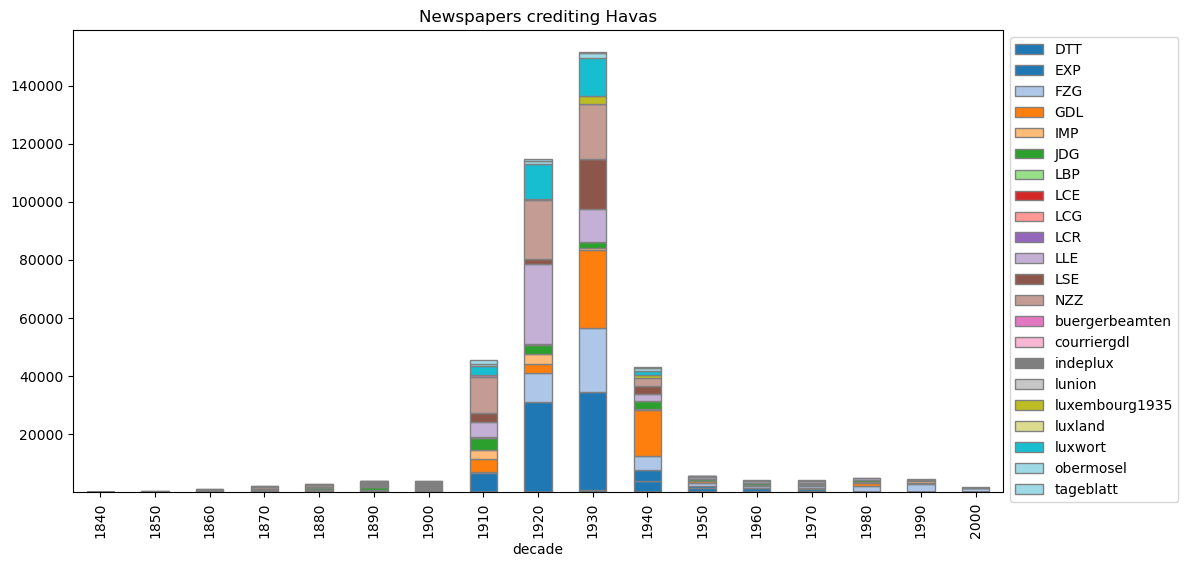

In [34]:
plot_subscribers_of_ag('Havas')

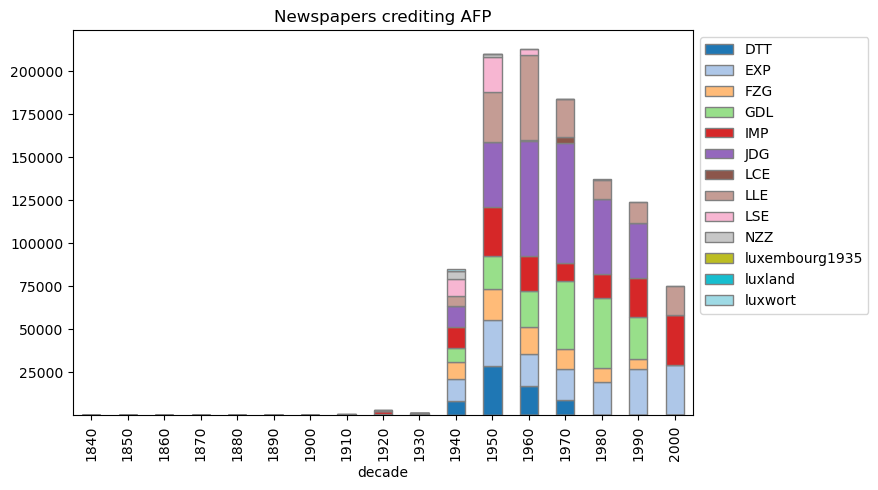

In [35]:
plot_subscribers_of_ag('AFP', decs=list(range(1900, 2010, 10)), figsz=(8,5))

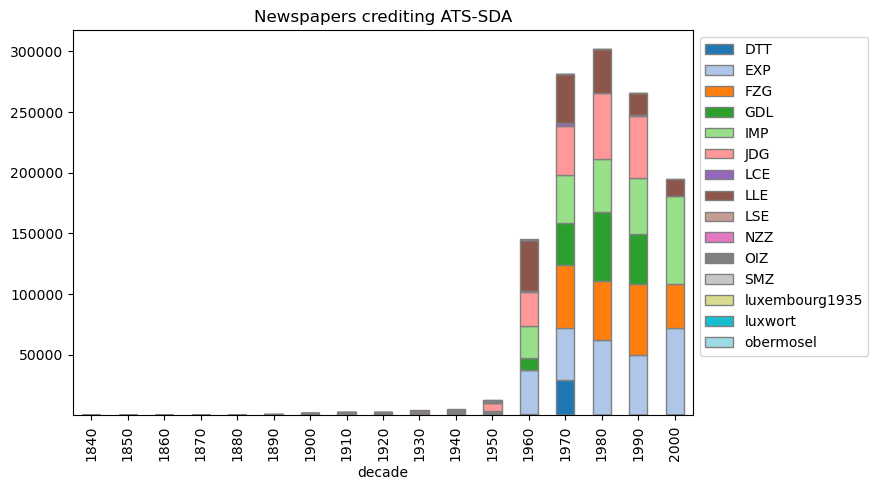

In [36]:
plot_subscribers_of_ag('ATS-SDA', decs=list(range(1890, 2010, 10)), figsz=(8,5))

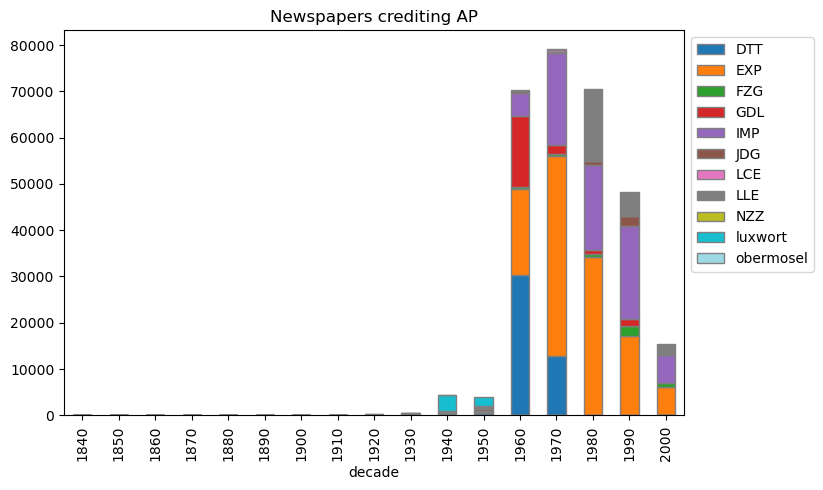

In [37]:
plot_subscribers_of_ag('AP', decs=list(range(1890, 2010, 10)), figsz=(8,5))

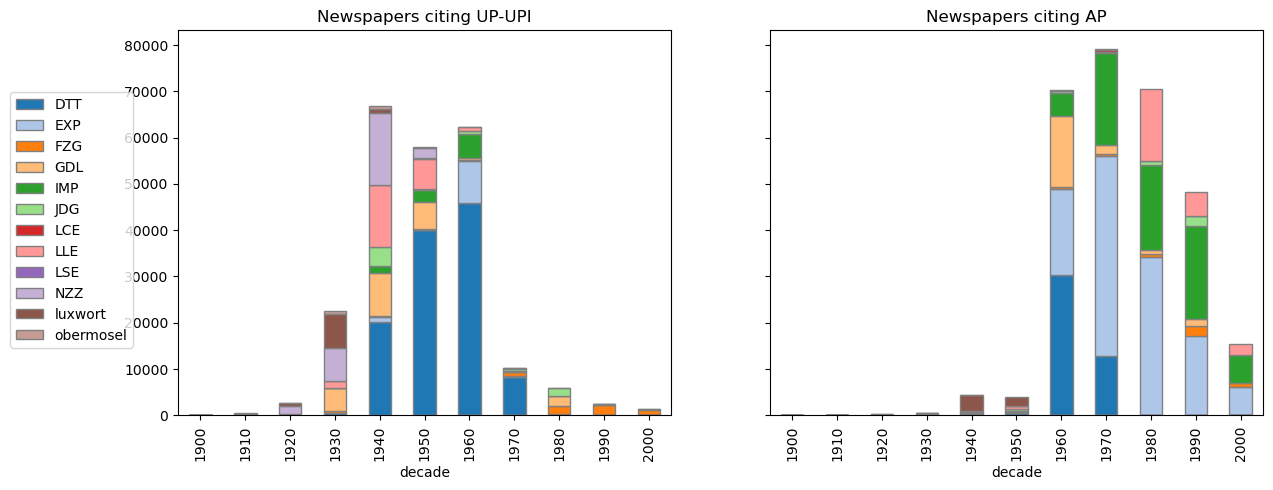

In [38]:
UP_decs = get_subscribers_of_ag('UP-UPI', decs=list(range(1900, 2010, 10)))
AP_decs = get_subscribers_of_ag('AP', decs=list(range(1900, 2010, 10)))

#making custom colormap
nps = sorted(list(set(list(UP_decs.columns) + list(AP_decs.columns))))
colors = plt.cm.tab20
clist_np = [colors(i) for i in range(colors.N)]
cmap_np = dict(zip(nps, clist_np[:len(nps)]))

#plotting
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 5), sharey=True)

UP_decs.plot.bar(stacked=True, ax=ax1, legend=False, edgecolor='grey', color=cmap_np)
AP_decs.plot.bar(stacked=True, ax=ax2, legend=False, edgecolor='grey', color=cmap_np)

hand_lab_1 = zip(ax1.get_legend_handles_labels())
hand_lab_2 = zip(ax2.get_legend_handles_labels())

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
all_hand_lab = dict(zip(labels1, handles1))
all_hand_lab.update(dict(zip(labels2, handles2)))
all_hand_lab = dict(sorted(all_hand_lab.items()))

#ax2.legend(lines + lines2, labels + labels2, loc=0)
fig.legend(all_hand_lab.values(), all_hand_lab.keys(), bbox_to_anchor=(0,0.5), loc="center left")
ax1.set_title('Newspapers citing UP-UPI')
ax2.set_title('Newspapers citing AP')
plt.show()

## Newspapers

In [39]:
articles['newspaper'].value_counts()

EXP             435581
JDG             378324
IMP             337433
GDL             304975
FZG             296785
                 ...  
landwortbild         3
actionfem            3
JDV                  2
kommmit              1
LSR                  1
Name: newspaper, Length: 71, dtype: int64

<AxesSubplot: title={'center': '#articles per newspaper'}, xlabel='newspaper'>

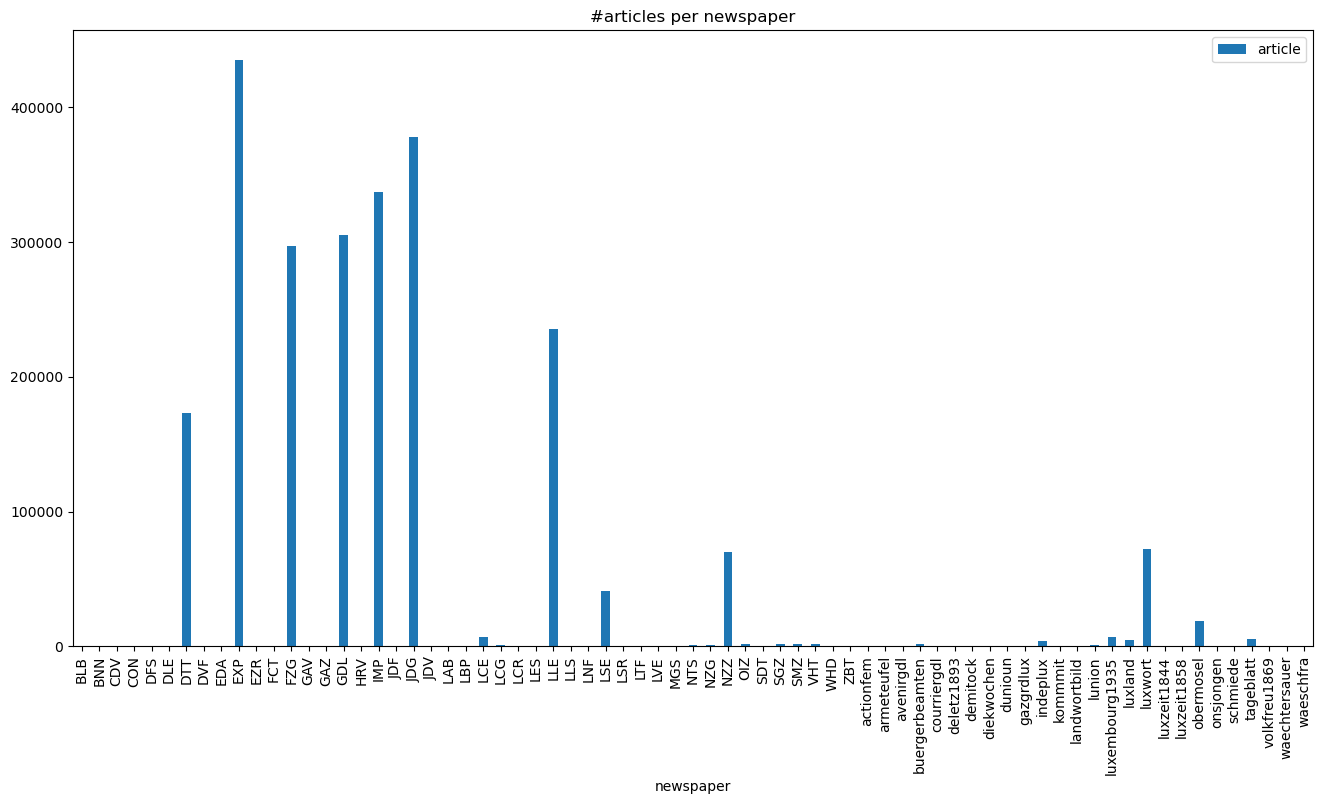

In [40]:
articles[['article', 'newspaper']].groupby('newspaper').count().plot.bar(figsize=(16,8), title="#articles per newspaper")

### Over Time

In [41]:
def plot_np_over_time(df, np, cmap=custom_cmap):
    np_per_dec = pd.pivot_table(df[df['newspaper']==np], index="decade", columns="agency", values="article", aggfunc="count")

    np_per_dec.plot(kind="bar", stacked=True, figsize=(12,6), ylabel="#mentions", title=f"{np}: #agency mentions per news agency over time", color=cmap, edgecolor="grey")
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")

Most frequent Swiss newspapers:
FZG    849636
EXP    714307
JDG    575723
IMP    520793
GDL    472375
Name: newspaper, dtype: int64


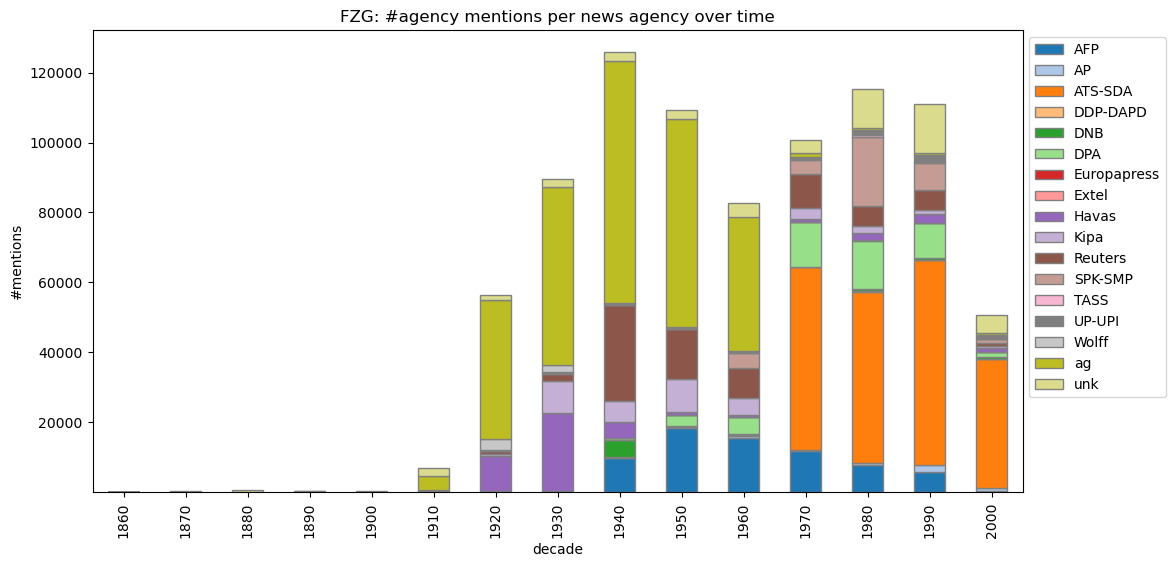

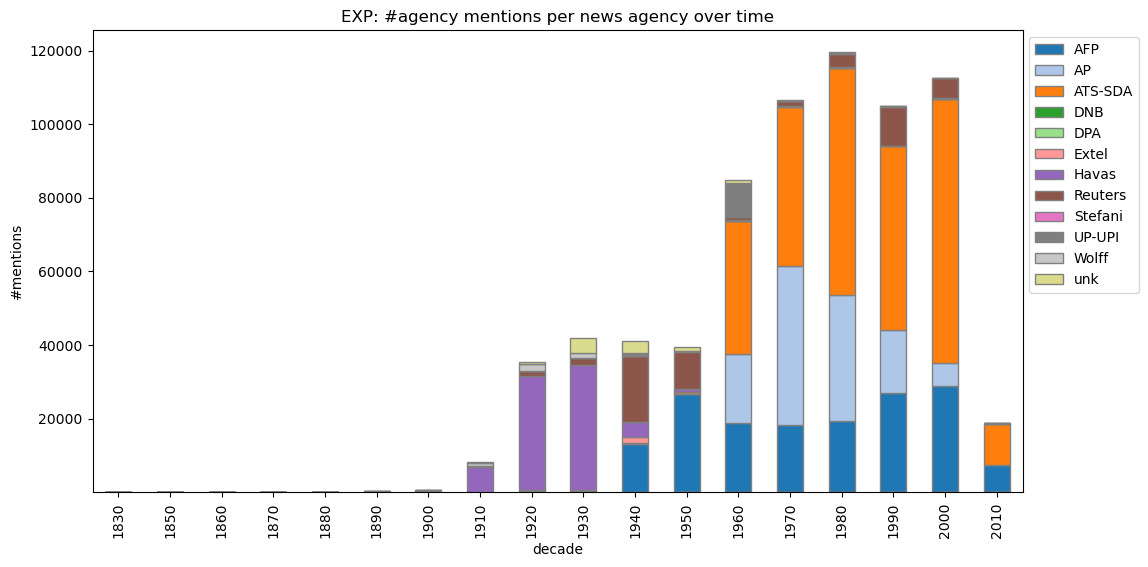

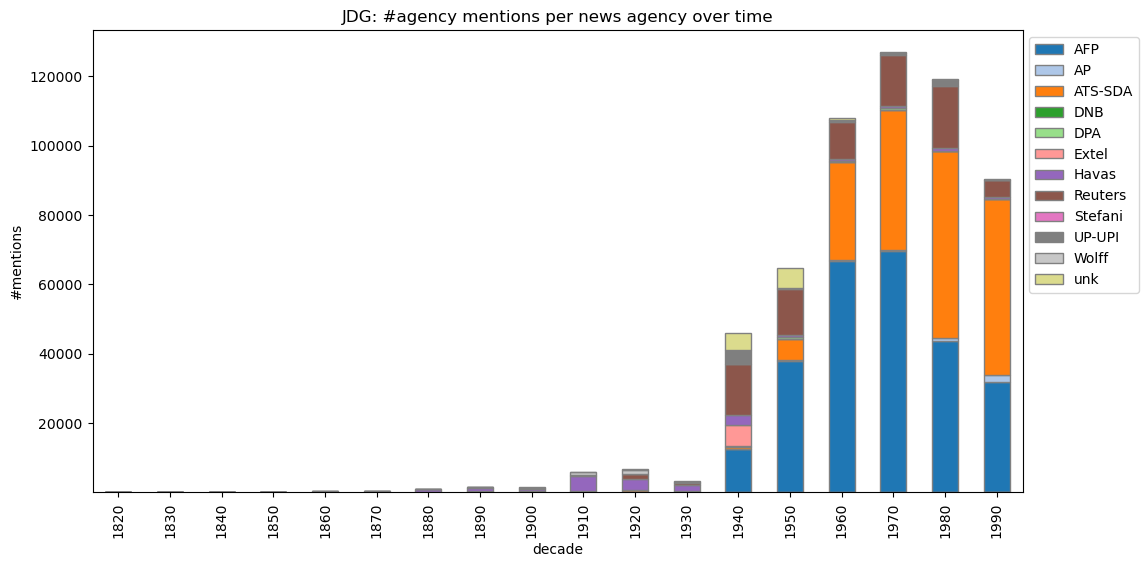

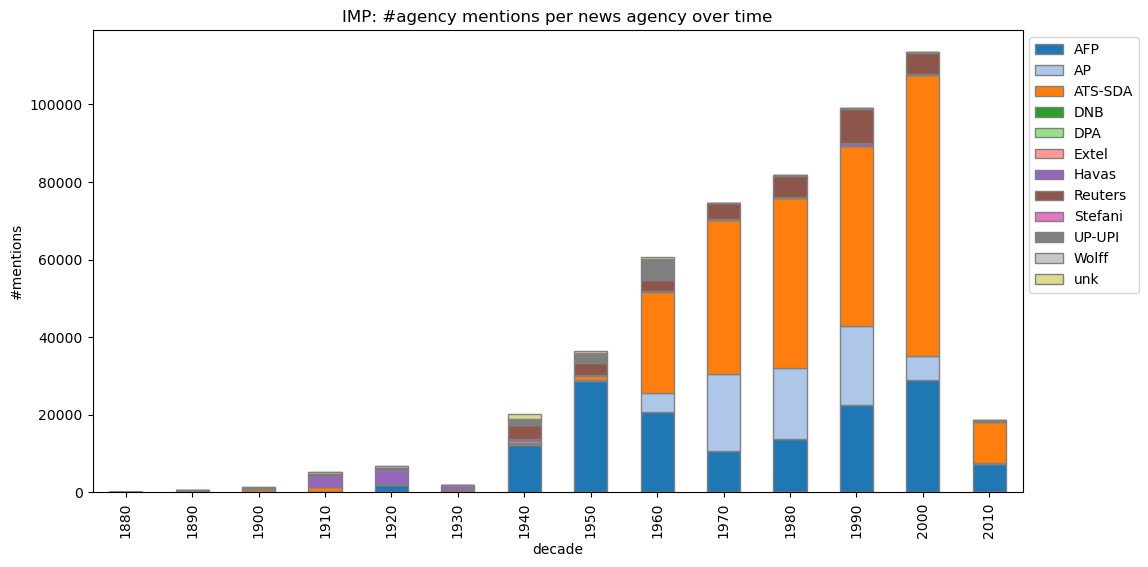

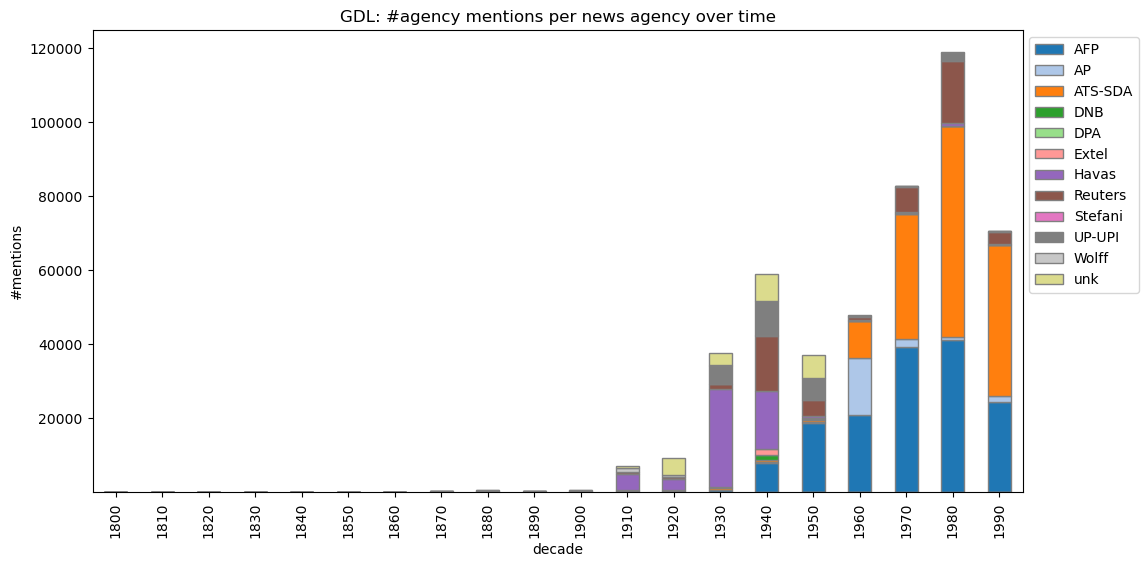

In [29]:
#Swiss Newspapers
freq_np_CH = mentions_all.loc[mentions_all['country']=="CH", 'newspaper'].value_counts()[:5]
print(f"Most frequent Swiss newspapers:\n{freq_np_CH}")

for newspaper in freq_np_CH.index:
    plot_np_over_time(mentions_all, newspaper)

plt.show()

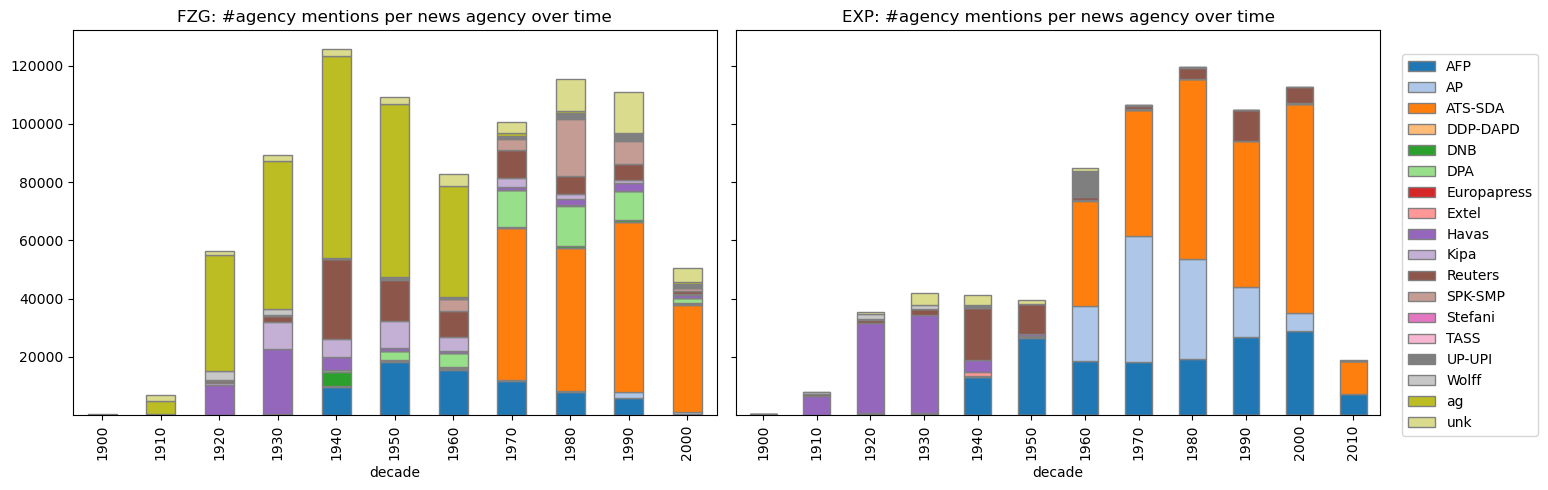

In [50]:
FZG_per_dec = pd.pivot_table(mentions_all[(mentions_all['newspaper']=='FZG') & (mentions_all['decade'] >= 1900)], index="decade", columns="agency", values="article", aggfunc="count")
EXP_per_dec = pd.pivot_table(mentions_all[(mentions_all['newspaper']=='EXP') & (mentions_all['decade'] >= 1900)], index="decade", columns="agency", values="article", aggfunc="count")


#plotting
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14, 5), sharey=True)

FZG_per_dec.plot.bar(stacked=True, ax=ax1, legend=False, edgecolor='grey', color=custom_cmap, title="FZG: #agency mentions per news agency over time")
EXP_per_dec.plot.bar(stacked=True, ax=ax2, legend=False, edgecolor='grey', color=custom_cmap, title= "EXP: #agency mentions per news agency over time")

hand_lab_1 = zip(ax1.get_legend_handles_labels())
hand_lab_2 = zip(ax2.get_legend_handles_labels())

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
all_hand_lab = dict(zip(labels1, handles1))
all_hand_lab.update(dict(zip(labels2, handles2)))
all_hand_lab = dict(sorted(all_hand_lab.items()))

#ax2.legend(lines + lines2, labels + labels2, loc=0)
fig.legend(all_hand_lab.values(), all_hand_lab.keys(), bbox_to_anchor=(1,0.5), loc="center left")
fig.tight_layout()
plt.show()

Most frequent Luxembourgish newspapers:
luxwort           102573
obermosel          22413
luxembourg1935      7874
tageblatt           7458
indeplux            5457
Name: newspaper, dtype: int64


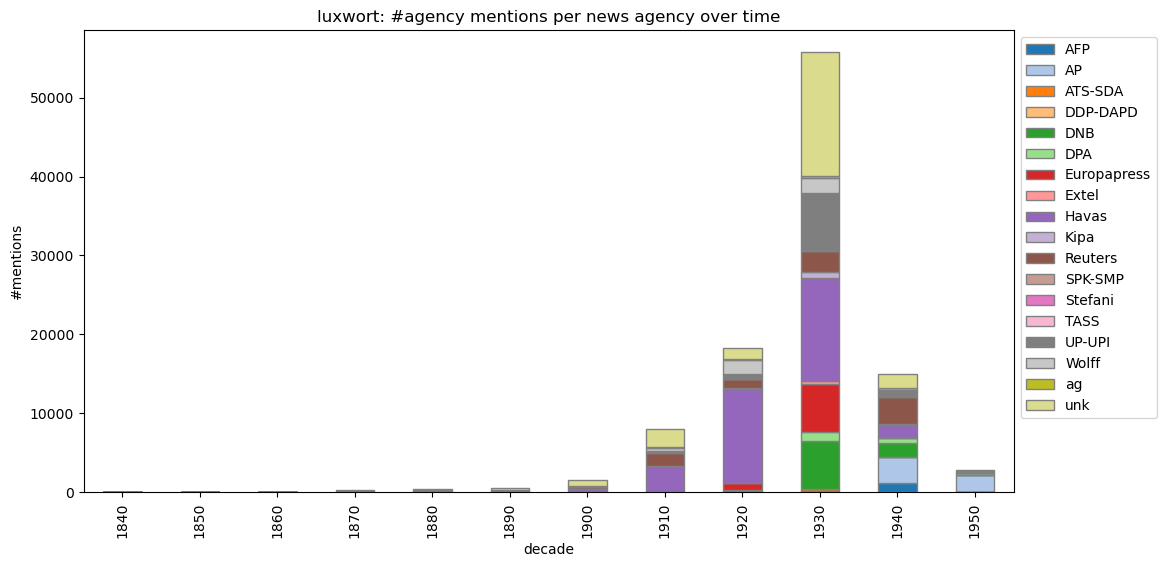

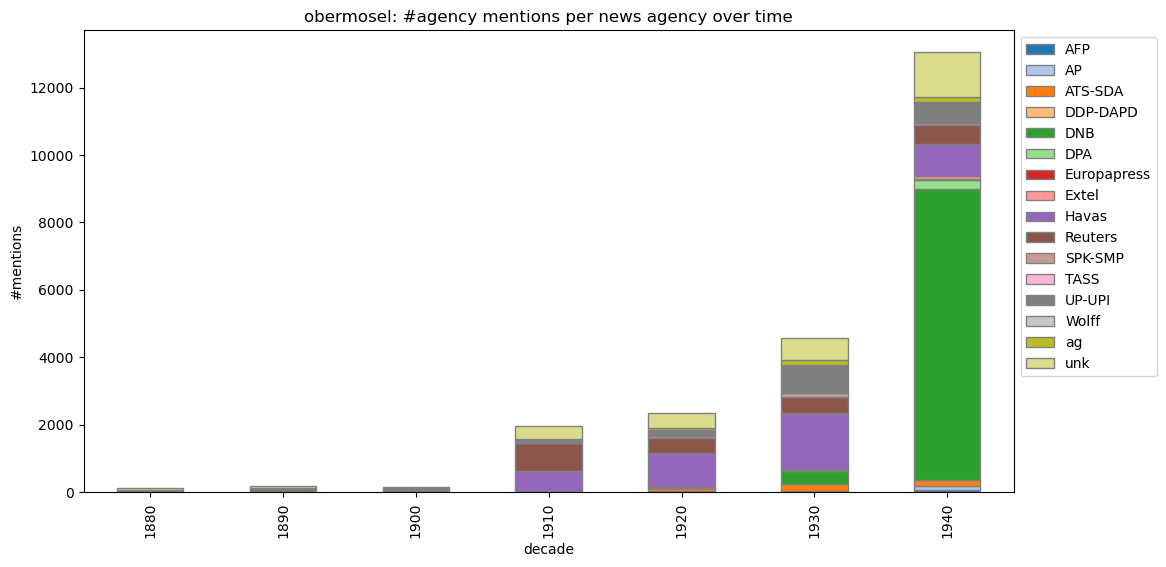

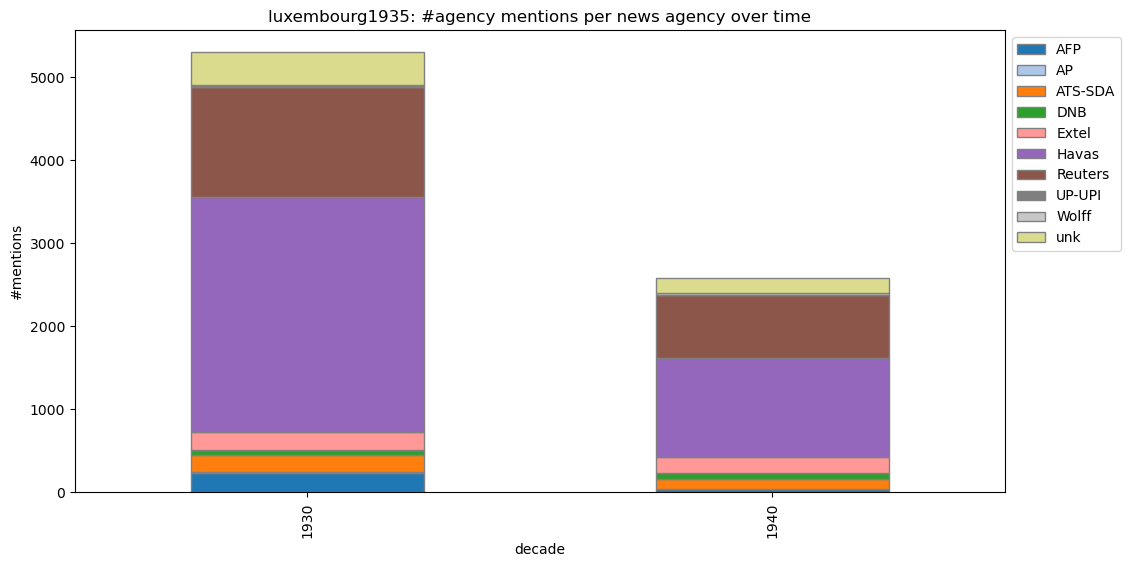

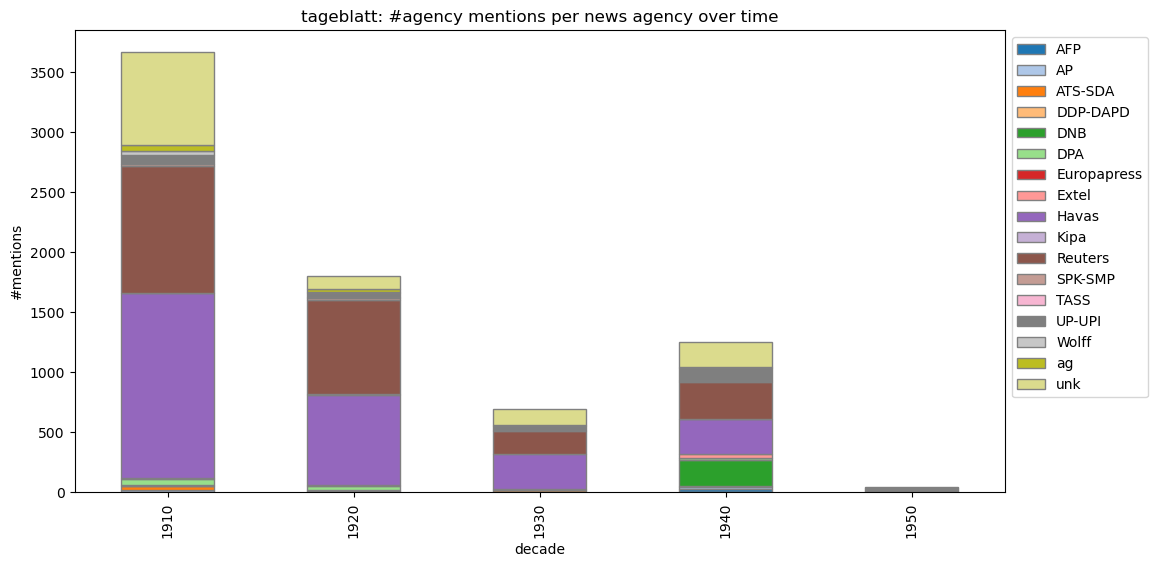

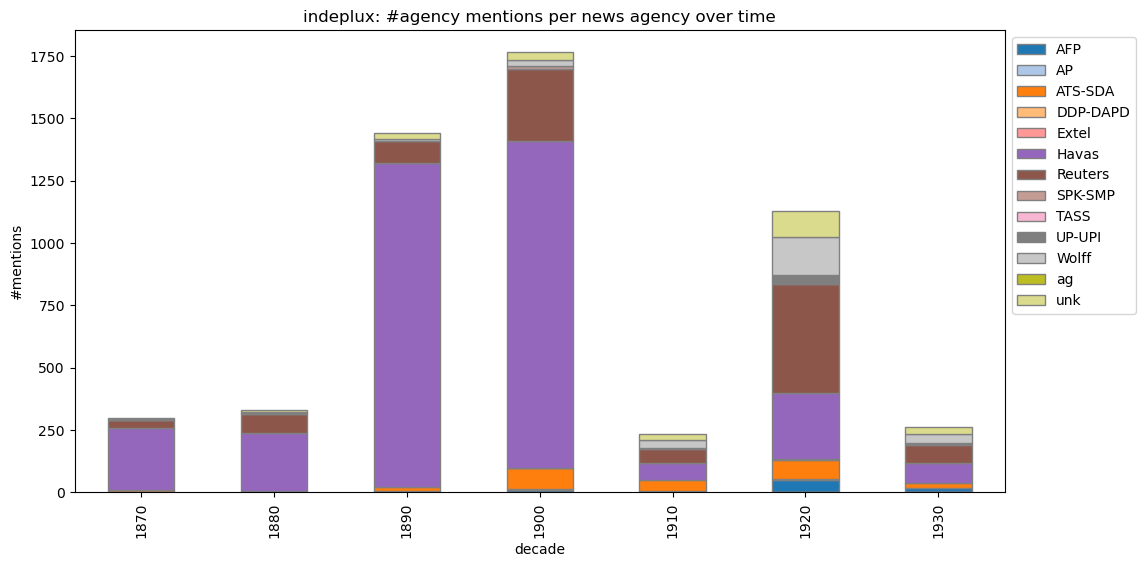

In [30]:
#Luxembourgish Newspapers
freq_np_LUX = mentions_all.loc[mentions_all['country']=="LU", 'newspaper'].value_counts()[:5]
print(f"Most frequent Luxembourgish newspapers:\n{freq_np_LUX}")

for newspaper in freq_np_LUX.index:
    plot_np_over_time(mentions_all, newspaper)

plt.show()

## Multiple Agency Mentions per Article

In [31]:
multiple_ag = mentions_all.groupby(['article', 'sentence_idx:']).agg({
    'agency': list,
    'surface': list,
    'id': list,
    'lSentenceOffset': list,
    'language': 'first',
    'newspaper': 'first',
    'year': 'first',
    'decade': 'first',
}).reset_index()
#only save entries with multiple agencies per sentence
multiple_ag = multiple_ag[multiple_ag['agency'].str.len() > 2]
multiple_ag.head()

,article,sentence_idx:,agency,surface,id,lSentenceOffset,language,newspaper,year,decade
813,DTT-1939-08-18-a-i0052,45,"[Reuters, Havas, DNB]","[Reutter, Havas, DNB]",[DTT-1939-08-18-a-i0052:45:0:7:6478:6485:newsa...,"[0, 10, 24]",de,DTT,1939,1930
3207,DTT-1939-12-23-a-i0002,35,"[UP-UPI, UP-UPI, UP-UPI]","[United Preß, United Preß, United Preß]",[DTT-1939-12-23-a-i0002:35:2:13:3998:4009:news...,"[2, 2, 2]",de,DTT,1939,1930
3917,DTT-1940-01-19-a-i0009,1,"[ag, Havas, UP-UPI]","[ag., Agentur, Taß]",[DTT-1940-01-19-a-i0009:1:-1:2:40:43:newsag:be...,"[-1, 22, 30]",de,DTT,1940,1940
3942,DTT-1940-01-20-a-i0015,58,"[ag, Havas, UP-UPI]","[ag., Agentur, Taß]",[DTT-1940-01-20-a-i0015:58:-1:2:6886:6889:news...,"[-1, 22, 30]",de,DTT,1940,1940
4118,DTT-1940-01-29-a-i0007,28,"[ag, Reuters, Havas]","[ag., Reuter, Havas]",[DTT-1940-01-29-a-i0007:28:-1:2:4222:4225:news...,"[-1, 247, 394]",de,DTT,1940,1940


In [32]:
multiple_ag['agency'].value_counts()[:50]

[ATS-SDA, AFP, Reuters]             15678
[ATS-SDA, Reuters, AFP]              2295
[ATS-SDA, DPA, AFP]                  1543
[ATS-SDA, DPA, Reuters]              1373
[ATS-SDA, AFP, DPA]                  1238
[ATS-SDA, AFP, DPA, Reuters]         1146
[ATS-SDA, AFP, AP]                   1019
[AFP, AFP, AFP]                       951
[ATS-SDA, DPA, AFP, Reuters]          882
[ATS-SDA, Reuters, DPA]               832
[ATS-SDA, DPA, Reuters, AFP]          788
[ATS-SDA, ATS-SDA, ATS-SDA]           681
[ATS-SDA, Reuters, DPA, AFP]          648
[ATS-SDA, Reuters, AFP, DPA]          557
[ATS-SDA, AFP, Reuters, DPA]          462
[ATS-SDA, ATS-SDA, AFP]               420
[AFP, AFP, AFP, AFP]                  415
[AP, ATS-SDA, AFP]                    407
[ATS-SDA, AFP, ATS-SDA]               385
[AFP, Reuters, AP]                    369
[ATS-SDA, ATS-SDA, Reuters]           350
[AP, AFP, Reuters]                    255
[ATS-SDA, AFP, Reuters, AP]           203
[ag, Havas, ag, Havas]            

-> question if sentence segmentation is good enough

In [33]:
multiple_ag.head()

,article,sentence_idx:,agency,surface,id,lSentenceOffset,language,newspaper,year,decade
813,DTT-1939-08-18-a-i0052,45,"[Reuters, Havas, DNB]","[Reutter, Havas, DNB]",[DTT-1939-08-18-a-i0052:45:0:7:6478:6485:newsa...,"[0, 10, 24]",de,DTT,1939,1930
3207,DTT-1939-12-23-a-i0002,35,"[UP-UPI, UP-UPI, UP-UPI]","[United Preß, United Preß, United Preß]",[DTT-1939-12-23-a-i0002:35:2:13:3998:4009:news...,"[2, 2, 2]",de,DTT,1939,1930
3917,DTT-1940-01-19-a-i0009,1,"[ag, Havas, UP-UPI]","[ag., Agentur, Taß]",[DTT-1940-01-19-a-i0009:1:-1:2:40:43:newsag:be...,"[-1, 22, 30]",de,DTT,1940,1940
3942,DTT-1940-01-20-a-i0015,58,"[ag, Havas, UP-UPI]","[ag., Agentur, Taß]",[DTT-1940-01-20-a-i0015:58:-1:2:6886:6889:news...,"[-1, 22, 30]",de,DTT,1940,1940
4118,DTT-1940-01-29-a-i0007,28,"[ag, Reuters, Havas]","[ag., Reuter, Havas]",[DTT-1940-01-29-a-i0007:28:-1:2:4222:4225:news...,"[-1, 247, 394]",de,DTT,1940,1940


In [34]:
len(multiple_ag)

42684

In [35]:
def get_ag_in_same_sent(row, distance=30):
    loffset = row['lSentenceOffset']
    #pair each offset with the next one
    paired_offsets = zip(loffset[:-1], loffset[1:])

    same_sent_pos = set()
    for pos, pair in enumerate(paired_offsets):
        if abs(pair[1] - pair[0]) <= distance:
            #save position in original list
            same_sent_pos.add(pos)
            same_sent_pos.add(pos + 1)

    return sorted(list(same_sent_pos))

In [36]:
mult_close_ag = multiple_ag.copy()
len_multiple_before = len(mult_close_ag)
print(f"#Sentences (df rows) before deletion of mentions which are too far apart: {len_multiple_before}")

#get all entries which are close to each other in one sentence
mult_close_ag['close_entries_pos'] = mult_close_ag.apply(get_ag_in_same_sent, axis=1)

#delete all sentences/df rows where no mention close to one another
mult_close_ag = mult_close_ag[mult_close_ag['close_entries_pos'].str.len() > 0]
print(f"Interim: #Sentences with no two mentions close to each other: {len_multiple_before - len(mult_close_ag)}")

#delete all mentions which are not close to one another
for col in ['agency', 'surface', 'id', 'lSentenceOffset']:
    mult_close_ag[col] = mult_close_ag.apply(lambda x: [x[col][i] for i in x['close_entries_pos']], axis=1)

print(f"#Sentences (df rows) after deletion of mentions which are too far apart: {len(mult_close_ag)} (deleted rows: {len_multiple_before - len(mult_close_ag)})")
mult_close_ag = mult_close_ag.drop(columns='close_entries_pos')

#Sentences (df rows) before deletion of mentions which are too far apart: 42684


Interim: #Sentences with no two mentions close to each other: 1958
#Sentences (df rows) after deletion of mentions which are too far apart: 40726 (deleted rows: 1958)


In [37]:
mult_close_ag.head()

,article,sentence_idx:,agency,surface,id,lSentenceOffset,language,newspaper,year,decade
813,DTT-1939-08-18-a-i0052,45,"[Reuters, Havas, DNB]","[Reutter, Havas, DNB]",[DTT-1939-08-18-a-i0052:45:0:7:6478:6485:newsa...,"[0, 10, 24]",de,DTT,1939,1930
3207,DTT-1939-12-23-a-i0002,35,"[UP-UPI, UP-UPI, UP-UPI]","[United Preß, United Preß, United Preß]",[DTT-1939-12-23-a-i0002:35:2:13:3998:4009:news...,"[2, 2, 2]",de,DTT,1939,1930
3917,DTT-1940-01-19-a-i0009,1,"[ag, Havas, UP-UPI]","[ag., Agentur, Taß]",[DTT-1940-01-19-a-i0009:1:-1:2:40:43:newsag:be...,"[-1, 22, 30]",de,DTT,1940,1940
3942,DTT-1940-01-20-a-i0015,58,"[ag, Havas, UP-UPI]","[ag., Agentur, Taß]",[DTT-1940-01-20-a-i0015:58:-1:2:6886:6889:news...,"[-1, 22, 30]",de,DTT,1940,1940
4496,DTT-1940-02-12-a-i0004,85,"[ag, Havas, Havas]","[ag., Agentur, Havas]",[DTT-1940-02-12-a-i0004:85:-1:2:8645:8648:news...,"[-1, 23, 31]",de,DTT,1940,1940


In [38]:
mult_close_ag['agency'].value_counts()

[ATS-SDA, AFP, Reuters]                      15239
[ATS-SDA, Reuters, AFP]                       2261
[ATS-SDA, DPA, AFP]                           1544
[ATS-SDA, DPA, Reuters]                       1384
[ATS-SDA, AFP, DPA]                           1232
                                             ...  
[Extel, DPA, AFP]                                1
[ATS-SDA, Reuters, unk, Reuters, Reuters]        1
[Havas, DPA, AFP]                                1
[unk, ATS-SDA, Reuters, DPA, AFP]                1
[Reuters, unk, Havas]                            1
Name: agency, Length: 1033, dtype: int64

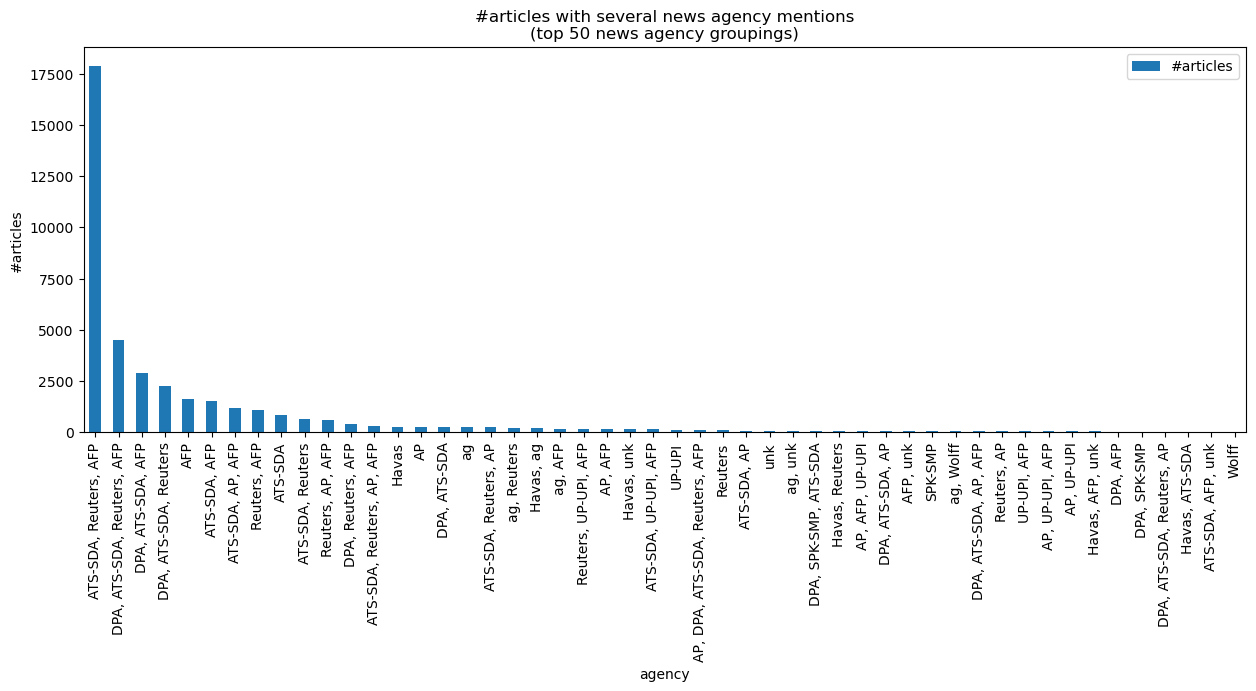

In [39]:
na_mult_grouped = mult_close_ag.copy()[['id', 'agency']]
na_mult_grouped['agency'] = na_mult_grouped['agency'].apply(lambda x: ", ".join(set(x)))
na_mult_grouped = na_mult_grouped.groupby("agency").count().rename({"id":"#articles"}, axis=1)
na_mult_grouped.nlargest(50, "#articles").plot(kind="bar", ylabel="#articles", title="#articles with several news agency mentions\n(top 50 news agency groupings)", figsize=(15,5))
plt.show()

In [40]:
mult_close_ag['newspaper'].value_counts()

FZG               14278
IMP               12957
EXP                7741
JDG                1740
GDL                1648
LLE                 928
DTT                 724
NZZ                 477
luxwort              69
obermosel            49
LSE                  30
tageblatt            20
LCE                  18
indeplux             11
buergerbeamten        7
luxembourg1935        6
luxland               5
LLS                   4
LCR                   3
VHT                   3
LES                   1
courriergdl           1
SMZ                   1
lunion                1
SDT                   1
OIZ                   1
GAV                   1
LTF                   1
Name: newspaper, dtype: int64

In [41]:
articles['newspaper'].value_counts()

EXP             435581
JDG             378324
IMP             337433
GDL             304975
FZG             296785
                 ...  
actionfem            3
landwortbild         3
JDV                  2
LSR                  1
kommmit              1
Name: newspaper, Length: 71, dtype: int64